[Matthew Feickert](http://www.matthewfeickert.com/), October 2016

In [1]:
import numpy as np
import scipy.stats as stats
import scipy.optimize as optimize
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Probability integral transform

The probability integral transform states that if $X$ is a continuous random variable with cumulative distribution function $F_{X}$, then the random variable $\displaystyle Y=F_{X}(X)$ has a uniform distribution on $[0, 1]$. The inverse of this is the "[inverse probability integral transform](https://en.wikipedia.org/wiki/Inverse_transform_sampling).'' [[1]](#Ref:Wikipedia_Probability-integral-transform)

## "Proof"

Let a random variable, $Y$, be defined by $Y = \displaystyle F_{X}(X)$ where $X$ is another random variable. Then,

\begin{split}
F_{Y}(y) &= \text{P}(Y \leq y)\\
 &= \text{P}(F_{X}(X) \leq y) \\
 &= \text{P}(F_{X}(X) \leq F_{X}^{-1}(y)) \\
 &= F_{X}(F_{X}^{-1}(y)) \\
 &= y.
\end{split}

$\displaystyle F_{Y}(y) = y$ describes the cumulative distribution function of a random variable, i.e., $Y = \displaystyle F_{X}(X)$, uniformly distributed on $[0,1]$. [[1]](#Ref:Wikipedia_Probability-integral-transform)

### Alternative View: A Change of variables

Consider the variable transformation
\begin{split}
y(x) = F(x) = \int\limits_{-\infty}^{x} f(x')\,dx'.
\end{split}
So the transofrmation from the distribution $f(x)$ to the distribution $f(y)$ required a Jacobian (determinant),
\begin{split}
\frac{dy}{dx} &= \frac{d}{dx} \int\limits_{-\infty}^{x} f(x')\,dx' \\
 &= f(x),
\end{split}
such that the distribution of $y$ is

\begin{split}
f(y) &= \left(\frac{1}{\left|\frac{dy}{dx}\right|}\right) \,f(x) \\
 &= \frac{f(x)}{f(x)}\\
 &= 1,
\end{split}

which is the probability density function for the Uniform distribution from $[0,1]$. [[2]](#Ref:Cranmer)

## Example:

Let's *uniformly* sample $n$ measurements from a Gaussian distribution with true mean $\mu$ and true standard deviation $\sigma$.

In [2]:
x = np.linspace(-5.0, 5.0, num=10000)
# mean and standard deviation
mu = 0
sigma = 1

# sample the distribution
number_of_samples = 5000
samples = np.random.normal(mu, sigma, number_of_samples)
samples.sort()

In [3]:
# get sample parameters
sample_mean = np.mean(samples)
sample_std = np.std(samples)

In [4]:
true_distribution = stats.norm.pdf(x, mu, sigma)

Histogram the distribution

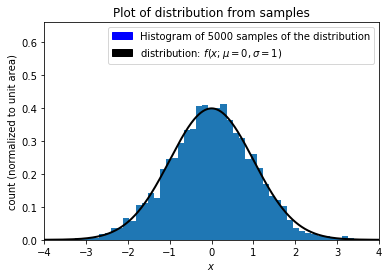

In [5]:
n_bins = 1
if number_of_samples < 50:
    n_bins = number_of_samples
else:
    n_bins = 50

# Plots
plt.figure(1)

# Plot histogram of samples
hist_count, bins, _ = plt.hist(samples, n_bins, normed=True) #Norm to keep distribution in view
# Plot distribution using sample parameters
plt.plot(x, true_distribution, linewidth=2, color='black')

# Axes
plt.title('Plot of distribution from samples')
plt.xlabel('$x$')
plt.ylabel('count (normalized to unit area)')
sample_window_w = sample_std * 1.5
#plt.xlim([sample_mean - sample_window_w, sample_mean + sample_window_w])
plt.xlim([-4, 4])
plt.ylim([0, hist_count.max() * 1.6])

# Legends
sample_patch = mpatches.Patch(color='black',
                              label='distribution: $f(x;\mu={},\sigma={})$'.format(mu,sigma))
data_patch = mpatches.Patch(color='blue',
                            label='Histogram of {} samples of the distribution'.format(number_of_samples))

plt.legend(handles=[data_patch, sample_patch])

plt.show()
#print(samples)

Now let's feed our samples through the cumulative distribution function

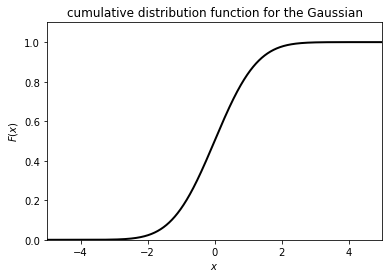

In [6]:
# Plots
plt.figure(1)

# Plot distribution using sample parameters
plt.plot(x, stats.norm.cdf(x), linewidth=2, color='black')

# Axes
plt.title('cumulative distribution function for the Gaussian')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')

plt.xlim([-5, 5])
plt.ylim([0, 1.1])

plt.show()

In [7]:
output = stats.norm.cdf(samples)
#print(output)

Now let's plot the output and compare it to the uniform distribution.

In [8]:
# uniform distirbution
uniform_distribution = stats.uniform.pdf(x)

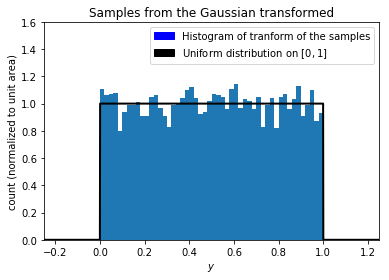

In [9]:
# Plots
plt.figure(1)

# Plot histogram of samples
hist_count, bins, _ = plt.hist(output, n_bins, normed=True) #Norm to keep distribution in view
# Plot distribution using sample parameters
plt.plot(x, uniform_distribution, linewidth=2, color='black')
# Axes
plt.title('Samples from the Gaussian transformed')
plt.xlabel('$y$')
plt.ylabel('count (normalized to unit area)')

plt.xlim([-0.25, 1.25])
plt.ylim([0, hist_count.max() * 1.4])

# Legends
sample_patch = mpatches.Patch(color='black',
                              label='Uniform distribution on $[{},{}]$'.format(0,1))
data_patch = mpatches.Patch(color='blue',
                            label='Histogram of tranform of the samples')

plt.legend(handles=[data_patch, sample_patch])

plt.show()

Now let's use the quantile function to recover the original Gaussian distribution from the Uniform distribution.

In [10]:
recovered = stats.norm.ppf(output)

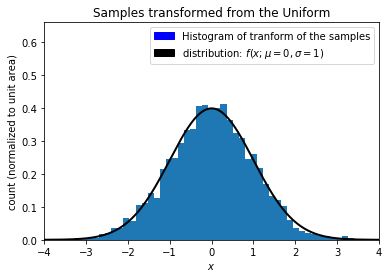

In [11]:
# Plots
plt.figure(1)

# Plot histogram of samples
hist_count, bins, _ = plt.hist(recovered, n_bins, normed=True) #Norm to keep distribution in view
# Plot distribution using sample parameters
plt.plot(x, true_distribution, linewidth=2, color='black')
# Axes
plt.title('Samples transformed from the Uniform')
plt.xlabel('$x$')
plt.ylabel('count (normalized to unit area)')

plt.xlim([-4, 4])
plt.ylim([0, hist_count.max() * 1.6])

# Legends
sample_patch = mpatches.Patch(color='black',
                              label='distribution: $f(x;\mu={},\sigma={})$'.format(mu,sigma))
data_patch = mpatches.Patch(color='blue',
                            label='Histogram of tranform of the samples')

plt.legend(handles=[data_patch, sample_patch])

plt.show()

## Summary

Thus, we have seen that taking a distribution (pdf) $X$, and transforming it through the distribution's cdf will result in an uniform distribution, $U$, and that transforming $U$ through the quantile function of $X$ will result in the pdf of $X$. Transformations back and forth between $X$ and $U$ by careful use of the properties of the cdf and quantile functions is a useful thing to think about. [[3]](#Ref:Hetherly)

# References
 1. <a id='Ref:Wikipedia_Probability-integral-transform'></a> Wikipedia, [Probability integral transform](https://en.wikipedia.org/wiki/Probability_integral_transform)
 2. <a id='Ref:Cranmer'></a> K. Cranmer, ["How do distributions transform under a change of variables?"](http://nbviewer.jupyter.org/github/cranmer/intro-exp-phys-II/blob/master/change-of-variables.ipynb)
 3. <a id='Ref:Hetherly'></a> J. Hetherly, Discussions with the author while at CERN, October 2016